In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
%store -r share_name

In [267]:
df = pd.read_csv(f'company/{share_name}.csv')

In [268]:
share_name

'USLB'

In [269]:
df.head()

,SN,Date,LTP,%change,High,Low,Open,Qty.,Turnover
0,1,2023/12/21,792.00,-7.26,840.00,791.00,840.00,"3,505","2,818,082.70"
1,2,2023/12/20,854.00,7.83,857.00,737.50,777.00,"4,700","3,777,203.50"
2,3,2023/12/19,792.00,10.00,792.00,703.00,718.00,"3,042","2,206,472.10"
3,4,2023/12/17,675.00,-1.96,700.00,660.00,700.00,"1,595","1,062,728.50"
4,5,2023/12/14,688.50,-2.75,721.00,656.00,721.00,"3,568","2,386,841.80"


In [270]:
# remove the comlun with name
df = df.drop(['SN'], axis=1)




In [271]:
# check the data type
df.dtypes

Date         object
LTP          object
%change     float64
High         object
Low          object
Open         object
Qty.         object
Turnover     object
dtype: object

In [272]:
# make the qty and turnover to float
df['Qty.'] = df['Qty.'].replace(',','', regex=True).astype(float)
df['Turnover'] = df['Turnover'].replace(',','', regex=True).astype(float)
df['LTP'] = df['LTP'].replace(',','', regex=True).astype(float)
df['Open'] = df['Open'].replace(',','', regex=True).astype(float)
df['High'] = df['High'].replace(',','', regex=True).astype(float)
df['Low'] = df['Low'].replace(',','', regex=True).astype(float)
df['Qty.'], df['Turnover']

(0       3505.0
 1       4700.0
 2       3042.0
 3       1595.0
 4       3568.0
         ...   
 765    17949.0
 766      574.0
 767      730.0
 768       76.0
 769       79.0
 Name: Qty., Length: 770, dtype: float64,
 0       2818082.7
 1       3777203.5
 2       2206472.1
 3       1062728.5
 4       2386841.8
           ...    
 765    19530624.0
 766      570794.0
 767      660684.0
 768       61352.0
 769       56898.0
 Name: Turnover, Length: 770, dtype: float64)

In [273]:
df.dtypes

Date         object
LTP         float64
%change     float64
High        float64
Low         float64
Open        float64
Qty.        float64
Turnover    float64
dtype: object

In [274]:
df.head()

,Date,LTP,%change,High,Low,Open,Qty.,Turnover
0,2023/12/21,792.0,-7.26,840.0,791.0,840.0,3505.0,2818082.7
1,2023/12/20,854.0,7.83,857.0,737.5,777.0,4700.0,3777203.5
2,2023/12/19,792.0,10.00,792.0,703.0,718.0,3042.0,2206472.1
3,2023/12/17,675.0,-1.96,700.0,660.0,700.0,1595.0,1062728.5
4,2023/12/14,688.5,-2.75,721.0,656.0,721.0,3568.0,2386841.8


In [275]:
df['Date'] = pd.to_datetime(df['Date'])

In [276]:
df['Date']

0     2023-12-21
1     2023-12-20
2     2023-12-19
3     2023-12-17
4     2023-12-14
         ...    
765   2020-09-07
766   2020-09-06
767   2020-09-03
768   2020-09-02
769   2020-08-31
Name: Date, Length: 770, dtype: datetime64[ns]

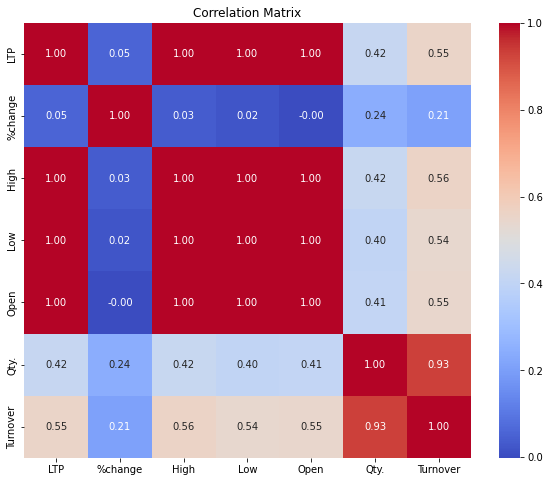

In [277]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

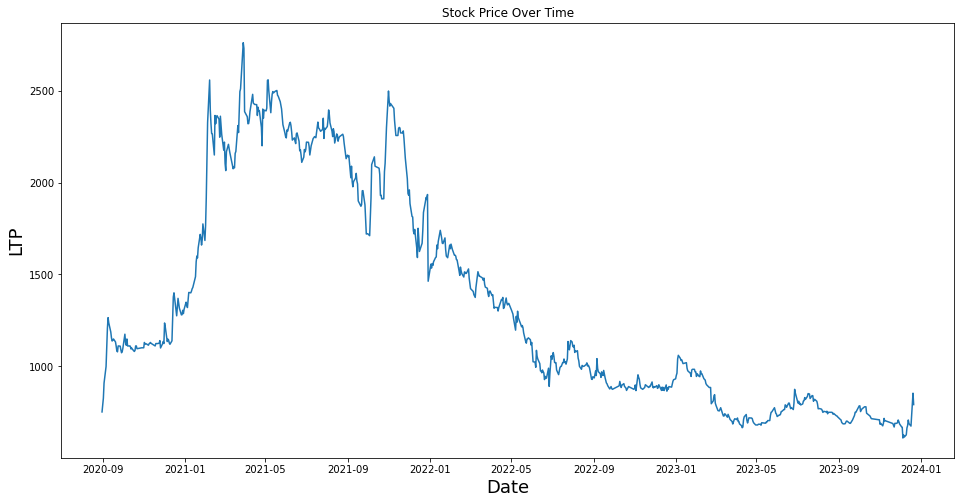

In [278]:
# Plotting "Date" against "LTP"-Last Trade Price
plt.figure(figsize=(16,8))
plt.title('Stock Price Over Time')
plt.xlabel('Date', fontsize=18)
plt.ylabel('LTP', fontsize=18)
plt.plot(df['Date'], df['LTP'])
plt.show()



In [279]:
df['%change']

0      -7.26
1       7.83
2      10.00
3      -1.96
4      -2.75
       ...  
765     9.91
766     9.90
767     9.92
768     9.97
769     9.94
Name: %change, Length: 770, dtype: float64

In [280]:
df['Month'] = df['Date'].dt.month

In [281]:
df.groupby('Month').mean()

,LTP,%change,High,Low,Open,Qty.,Turnover
Month,,,,,,,
1,1397.519672,0.708197,1418.781967,1367.273770,1389.085246,1665.459016,2.425648e+06
2,1606.933929,0.081250,1641.380357,1573.625000,1613.073214,2153.642857,4.706755e+06
3,1496.408772,0.111579,1520.356140,1465.207018,1495.529825,1646.578947,3.651221e+06
4,1448.281034,-0.134655,1468.437931,1420.632759,1442.998276,678.155172,1.339837e+06
5,1499.256897,-0.238276,1525.687931,1475.632759,1506.370690,1584.620690,3.411442e+06
6,1340.206061,0.162727,1367.684848,1322.818182,1344.416667,1067.954545,1.829122e+06
7,1315.640909,0.095152,1334.025758,1293.989394,1310.715152,906.515152,1.409441e+06
8,1303.144776,-0.339701,1319.717910,1286.350746,1303.816418,875.880597,1.523613e+06
9,1227.470667,0.210133,1249.658667,1209.208000,1229.024000,1297.800000,1.622153e+06


In [282]:
monthly_change = df.groupby('Month').mean()['%change']
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_change.index = monthly_change.index.map(month_names)
monthly_change

Month
Jan    0.708197
Feb    0.081250
Mar    0.111579
Apr   -0.134655
May   -0.238276
Jun    0.162727
Jul    0.095152
Aug   -0.339701
Sep    0.210133
Oct    0.629138
Nov   -0.322500
Dec    0.403026
Name: %change, dtype: float64

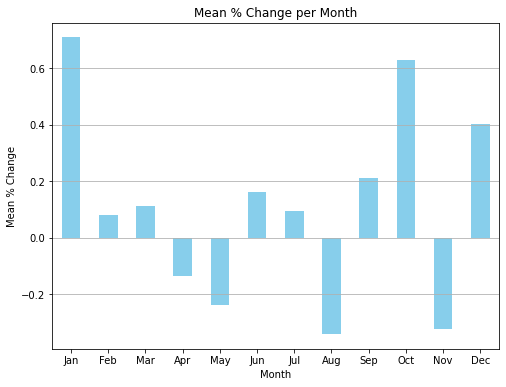

In [283]:
# Plotting month against the mean %change
plt.figure(figsize=(8, 6))
monthly_change.plot(kind='bar', color='skyblue')
plt.title('Mean % Change per Month')
plt.xlabel('Month')
plt.ylabel('Mean % Change')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [284]:
# Analyzing percentage change (%change)
df['Fluctuation'] = df['%change'].abs()  # Absolute value for fluctuations
threshold_fluctuation = 2.0  # Define your threshold for significant fluctuations
significant_fluctuations = df[df['Fluctuation'] > threshold_fluctuation]

In [285]:
df["Fluctuation"] = df['%change']
threshold_fluctuation = 2.0
significant_fluctuation = df[df['Fluctuation']> 2]
significant_fluctuations[['Date', '%change']]


,Date,%change
0,2023-12-21,-7.26
1,2023-12-20,7.83
2,2023-12-19,10.00
4,2023-12-14,-2.75
5,2023-12-13,4.42
...,...,...
765,2020-09-07,9.91
766,2020-09-06,9.90
767,2020-09-03,9.92
768,2020-09-02,9.97


In [286]:
print("Periods of significant fluctuations:")
print(significant_fluctuations[['Date', 'Fluctuation']].head(20))

Periods of significant fluctuations:
         Date  Fluctuation
0  2023-12-21         7.26
1  2023-12-20         7.83
2  2023-12-19        10.00
4  2023-12-14         2.75
5  2023-12-13         4.42
7  2023-12-11         5.99
10 2023-12-06         2.79
11 2023-12-05         8.81
13 2023-12-03         2.33
19 2023-11-23         2.99
22 2023-11-20         2.12
25 2023-11-07         3.90
26 2023-11-06         2.03
29 2023-11-01         3.44
35 2023-10-12         4.49
40 2023-10-03         3.95
42 2023-10-01         4.72
44 2023-09-25         2.33
45 2023-09-24         3.52
46 2023-09-21         2.61


Maximum price:  2761.0
Minimum price:  610.0
Mean price:  1352.3557142857144
Median price:  1121.0
Standard Deviation of price:  590.6708480101427
0    792.0
1    854.0
2    792.0
3    675.0
4    688.5
5    708.0
6    678.0
7    664.9
8    627.3
9    615.0
Name: LTP, dtype: float64


C:\Users\baral\AppData\Local\Temp\ipykernel_10956\2351986036.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LTP'], color='skyblue')


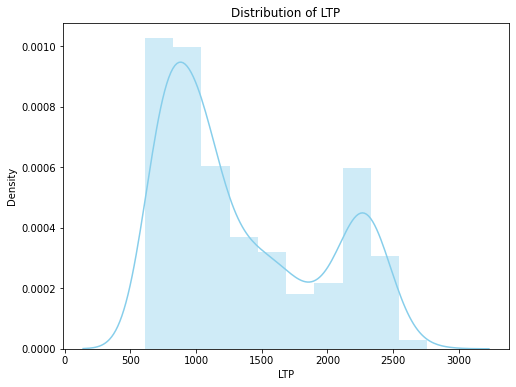

In [287]:
maximum_price = df['LTP'].max()
minimum_price = df['LTP'].min()
mean_price = df['LTP'].mean()
median_price = df['LTP'].median()
std_price = df['LTP'].std()

print("Maximum price: ", maximum_price)
print("Minimum price: ", minimum_price)
print("Mean price: ", mean_price)
print("Median price: ", median_price)
print("Standard Deviation of price: ", std_price)
print(df['LTP'].head(10))
# Plotting the distribution of the LTP
plt.figure(figsize=(8, 6))
sns.distplot(df['LTP'], color='skyblue')
plt.title('Distribution of LTP')
plt.xlabel('LTP')
plt.ylabel('Density')
plt.show()



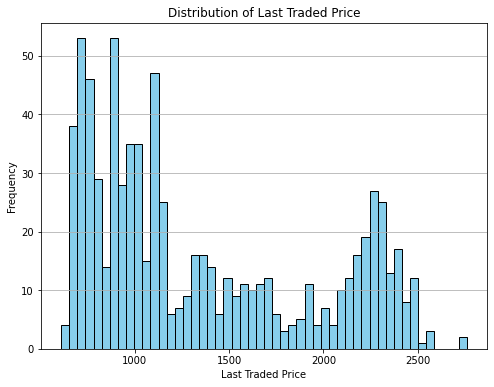

In [288]:
plt.figure(figsize=(8, 6))
plt.hist(df['LTP'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Last Traded Price')
plt.xlabel('Last Traded Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


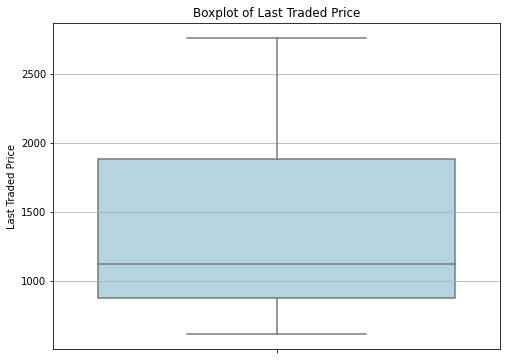

In [289]:
import seaborn as sns

# Plotting a boxplot to visualize the distribution and outliers of 'LTP' (Last Traded Price)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['LTP'], color='lightblue')
plt.title('Boxplot of Last Traded Price')
plt.ylabel('Last Traded Price')
plt.grid(axis='y')
plt.show()


In [290]:
from statsmodels.tsa.arima.model import ARIMA
reverse_ltp = df['LTP'].iloc[::-1]
model = ARIMA(reverse_ltp, order=(5, 1, 0))
model_fit = model.fit()


In [291]:
forecast = model_fit.forecast(steps=10)

In [292]:
forecast, df["LTP"].head(1)

(-1     792.437671
 -2     789.639208
 -3     774.325669
 -4     768.019581
 -5     774.136930
 -6     774.349097
 -7     775.207453
 -8     777.190081
 -9     777.880200
 -10    777.288279
 Name: predicted_mean, dtype: float64,
 0    792.0
 Name: LTP, dtype: float64)